In [1]:
import json
import requests
import numpy as np
import pandas as pd
import pandas as pd
import requests
from requests.auth import HTTPBasicAuth

USERNAME = 'damminhtien'
PASSWORD = '**********'
TARGET_USER = 'damminhtien'

authentication = HTTPBasicAuth(USERNAME, PASSWORD)

In [2]:
import uuid
from IPython.display import display_javascript, display_html, display

class printJSON(object):
    def __init__(self, json_data):
        if isinstance(json_data, dict):
            self.json_str = json.dumps(json_data)
        else:
            self.json_str = json_data
        self.uuid = str(uuid.uuid4())

    def _ipython_display_(self):
        display_html('<div id="{}" style="height: 100%; width:100%; color:red; background: #2f0743;"></div>'.format(self.uuid), raw=True)
        display_javascript("""
        require(["https://rawgit.com/caldwell/renderjson/master/renderjson.js"], function() {
        document.getElementById('%s').appendChild(renderjson(%s))
        });
        """ % (self.uuid, self.json_str), raw=True)

In [3]:
user_data = requests.get('https://api.github.com/users/' + TARGET_USER,
                    auth = authentication)
user_data = user_data.json()

In [4]:
printJSON(user_data)

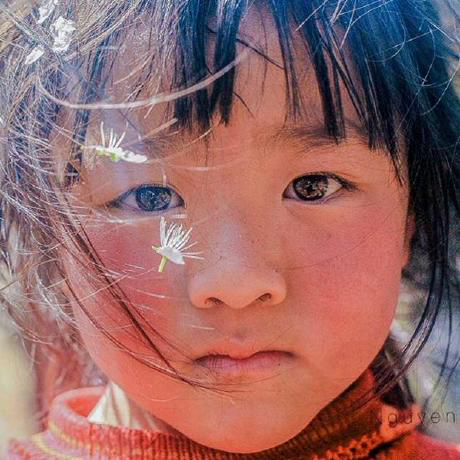

Name:,Dam Minh Tien
Company:,@BKFA
Bio:,Tech enthusiast
Public_repos:,58
Number followers:,31
Number following users:,61
Date joined:,2017-02-06T13:36:32Z


In [5]:
from PIL import Image
from io import BytesIO
from IPython.display import display, HTML
import tabulate

response = requests.get(user_data['avatar_url'])
ava_img = Image.open(BytesIO(response.content))
display(ava_img)

table = [["Name:", user_data['name']],
         ["Company:", user_data['company']],
         ["Bio:", user_data['bio']],
         ["Public_repos:", user_data['public_repos']],
         ["Number followers:", user_data['followers']],
         ["Number following users:", user_data['following']],
         ["Date joined:", user_data['created_at']]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

In [6]:
url = user_data['repos_url']
page_no = 1
repos_data = []
while (True):
    response = requests.get(url, auth = authentication)
    response = response.json()
    repos_data = repos_data + response
    repos_fetched = len(response)
    if (repos_fetched == 30):
        page_no = page_no + 1
        url = str(user_data['repos_url']) + '?page=' + str(page_no)
    else:
        break
        


In [7]:
printJSON(repos_data[0])

In [8]:
_LANGUAGE_IGNORE = ['HTML', 'CSS', 'Jupyter Notebook']
LANGUAGE_USED = []
TIMES_USED = []
STAR_COUNT = []
for rd in repos_data:
    if rd['fork']: continue
    response = requests.get(rd['languages_url'], auth = authentication)
    response = response.json()
    language_rd = list(response.keys())
    for l in language_rd:
        if l in _LANGUAGE_IGNORE: continue
        if l not in LANGUAGE_USED: 
            LANGUAGE_USED.append(l)
            TIMES_USED.append(response[l])
        else:
            TIMES_USED[LANGUAGE_USED.index(l)] += response[l] 

In [9]:
language_data = {'Languages': LANGUAGE_USED, 'Times': TIMES_USED} 
language_df = pd.DataFrame(language_data).sort_values(by=['Times'])
language_df 

,Languages,Times
2,Vue,565
6,Shell,2095
11,C#,3428
10,Makefile,7729
16,Lasso,19765
8,Roff,20573
15,Perl 6,22483
9,Perl,24908
14,ASP,43411
5,Ruby,48137


In [10]:
import plotly.express as px

fig = px.bar(language_df, x='Languages', y='Times',
             color='Languages',
             labels={'pop':'Statistic languages were used by user'}, height=400)
fig.show()

In [11]:
repos_information = []
for i, repo in enumerate(repos_data):
    data = []
    data.append(repo['id'])
    data.append(repo['name'])
    data.append(repo['description'])
    data.append(repo['created_at'])
    data.append(repo['updated_at'])
    data.append(repo['owner']['login'])
    data.append(repo['license']['name'] if repo['license'] != None else None)
    data.append(repo['has_wiki'])
    data.append(repo['fork'])
    data.append(repo['forks_count'])
    data.append(repo['open_issues_count'])
    data.append(repo['stargazers_count'])
    data.append(repo['watchers_count'])
    data.append(repo['url'])
    data.append(repo['commits_url'].split("{")[0])
    data.append(repo['url'] + '/languages')
    repos_information.append(data)
    
repos_df = pd.DataFrame(repos_information, columns = ['Id', 'Name', 'Description', 'Created on', 'Updated on', 
                                                      'Owner', 'License', 'Includes wiki', 'Is Fork','Forks count', 
                                                      'Issues count', 'Stars count', 'Watchers count',
                                                      'Repo URL', 'Commits URL', 'Languages URL'])

repos_df

,Id,Name,Description,Created on,Updated on,Owner,License,Includes wiki,Is Fork,Forks count,Issues count,Stars count,Watchers count,Repo URL,Commits URL,Languages URL
0,148719498,awesome-ai-keynotes,How is the fastest way to update the trend of ...,2018-09-14T01:38:53Z,2018-12-15T07:06:14Z,damminhtien,None,True,False,0,0,1,1,https://api.github.com/repos/damminhtien/aweso...,https://api.github.com/repos/damminhtien/aweso...,https://api.github.com/repos/damminhtien/aweso...
1,143116693,awesome-learning-bkfa,Repository for technology enthusiasts :fountai...,2018-08-01T07:00:01Z,2019-09-03T07:32:06Z,damminhtien,None,True,True,1,0,1,1,https://api.github.com/repos/damminhtien/aweso...,https://api.github.com/repos/damminhtien/aweso...,https://api.github.com/repos/damminhtien/aweso...
2,141204609,awesome-nodejs-keynotes,"awesome nodejs, key notes when learn nodejs, n...",2018-07-16T23:13:02Z,2019-09-21T08:11:28Z,damminhtien,None,True,False,3,0,4,4,https://api.github.com/repos/damminhtien/aweso...,https://api.github.com/repos/damminhtien/aweso...,https://api.github.com/repos/damminhtien/aweso...
3,171979391,awesome-semantic-segmentation,awesome-semantic-segmentation - list of awesom...,2019-02-22T02:20:49Z,2019-05-31T07:21:45Z,damminhtien,Apache License 2.0,True,False,1,0,0,0,https://api.github.com/repos/damminhtien/aweso...,https://api.github.com/repos/damminhtien/aweso...,https://api.github.com/repos/damminhtien/aweso...
4,100675934,BK-Encyclopedia,Hệ thống bách khoa toàn thư,2017-08-18T05:27:06Z,2019-09-03T07:31:59Z,damminhtien,None,True,False,1,0,3,3,https://api.github.com/repos/damminhtien/BK-En...,https://api.github.com/repos/damminhtien/BK-En...,https://api.github.com/repos/damminhtien/BK-En...
5,124911878,bkfa,Open source - the most interesting website fro...,2018-03-12T15:38:40Z,2019-09-03T07:32:12Z,damminhtien,Apache License 2.0,True,False,5,1,11,11,https://api.github.com/repos/damminhtien/bkfa,https://api.github.com/repos/damminhtien/bkfa/...,https://api.github.com/repos/damminhtien/bkfa/...
6,144253431,bkfav2,Website Q&A full topic,2018-08-10T07:36:50Z,2018-08-10T07:36:55Z,damminhtien,None,True,True,0,0,0,0,https://api.github.com/repos/damminhtien/bkfav2,https://api.github.com/repos/damminhtien/bkfav...,https://api.github.com/repos/damminhtien/bkfav...
7,153884304,bkfav3,FS-Focus ( FullStask - Follow One Course Unti...,2018-10-20T08:15:06Z,2019-02-04T17:18:49Z,damminhtien,Other,True,True,1,0,0,0,https://api.github.com/repos/damminhtien/bkfav3,https://api.github.com/repos/damminhtien/bkfav...,https://api.github.com/repos/damminhtien/bkfav...
8,108727726,BKFS_SystemAnalysisDesign,Repository of BKFS team - System analysis and...,2017-10-29T11:20:12Z,2018-11-06T08:55:30Z,damminhtien,None,True,False,2,0,6,6,https://api.github.com/repos/damminhtien/BKFS_...,https://api.github.com/repos/damminhtien/BKFS_...,https://api.github.com/repos/damminhtien/BKFS_...
9,145367368,cs231n-vietnamese,Course CS231n in vietnamese and solution. Khóa...,2018-08-20T04:47:10Z,2019-09-03T07:32:00Z,damminhtien,MIT License,True,False,0,0,1,1,https://api.github.com/repos/damminhtien/cs231...,https://api.github.com/repos/damminhtien/cs231...,https://api.github.com/repos/damminhtien/cs231...


In [12]:
repos_df.describe()

,Id,Forks count,Issues count,Stars count,Watchers count
count,5.800000e+01,58.000000,58.000000,58.000000,58.000000
mean,1.469467e+08,0.465517,0.103448,1.206897,1.206897
std,3.378143e+07,0.902541,0.446808,2.397064,2.397064
min,1.004967e+08,0.000000,0.000000,0.000000,0.000000
25%,1.245108e+08,0.000000,0.000000,0.000000,0.000000
50%,1.411105e+08,0.000000,0.000000,0.000000,0.000000
75%,1.704768e+08,1.000000,0.000000,1.000000,1.000000
max,2.138575e+08,5.000000,3.000000,11.000000,11.000000


In [13]:
star_fig = px.bar(repos_df[repos_df['Stars count']>0].sort_values(by=['Stars count']), x='Name', y='Stars count',
             color='Forks count', hover_data=['Description', 'License', 'Owner'],
             labels={'pop':'Statistic languages were used by user'})
star_fig.show()

In [14]:
url = repos_df.loc[23, 'Commits URL']
response = requests.get(url, auth = authentication)
response = response.json()
printJSON(response[0])

In [15]:
commits_information = []
for i in range(repos_df.shape[0]):
    if repos_df.loc[i, 'Is Fork']: continue
    url = repos_df.loc[i, 'Commits URL']
    page_no = 1
    while (True):
        try:
            response = requests.get(url, auth = authentication)
            response = response.json()
            for commit in response:
                commit_data = []
                commit_data.append(repos_df.loc[i, 'Name'])
                commit_data.append(repos_df.loc[i, 'Id'])
                commit_data.append(commit['commit']['committer']['date'])
                commit_data.append(commit['commit']['message'])
                commits_information.append(commit_data)
            if (len(response) == 30):
                page_no = page_no + 1
                url = repos_df.loc[i, 'Commits URL'] + '?page=' + str(page_no)
            else:
                break
        except:
            print(url + ' fetch failed')
            break

commits_df = pd.DataFrame(commits_information, columns = ['Name', 'Repo Id', 'Date', 'Message'])

https://api.github.com/repos/damminhtien/Facial-Landmarks/commits fetch failed


In [16]:
commits_df

,Name,Repo Id,Date,Message
0,awesome-ai-keynotes,148719498,2018-11-19T16:59:15Z,Update README.md
1,awesome-ai-keynotes,148719498,2018-11-06T09:48:36Z,rename change detection
2,awesome-ai-keynotes,148719498,2018-11-06T09:33:59Z,Merge branch 'master' of https://github.com/da...
3,awesome-ai-keynotes,148719498,2018-11-06T09:33:22Z,cleaner file name
4,awesome-ai-keynotes,148719498,2018-10-04T02:31:31Z,Update README.md
...,...,...,...,...
768,WVNC_HOME,100496745,2017-08-16T15:06:03Z,hii
769,WVNC_HOME,100496745,2017-08-16T14:43:46Z,hiii
770,WVNC_HOME,100496745,2017-08-16T14:41:11Z,Create README.md
771,WVNC_HOME,100496745,2017-08-16T14:40:01Z,hii


In [17]:
print("Two most common commit messages: {}".format(' and '.join(commits_df['Message'].value_counts().index[:2])))

Two most common commit messages: Update README.md and first commit


In [18]:
commit_per_repo_fig = px.bar(commits_df.groupby('Name').count().reset_index(level=['Name']), x='Name', y='Message',
             color='Name',
             labels={'pop':'Commit per repositories'})
commit_per_repo_fig.show()

In [19]:
commits_df['Year'] = commits_df['Date'].apply(lambda x: x.split('-')[0])
yearly_stats = commits_df.groupby('Year').count()['Repo Id']
yearly_stats_df = yearly_stats.to_frame().reset_index(level=['Year'])
yearly_stats_df

,Year,Repo Id
0,2017,176
1,2018,495
2,2019,102


In [20]:
yearly_stats_fig = px.bar(yearly_stats_df, x='Year', y='Repo Id',
             color='Year',
             labels={'pop':'Commit per Year'})
yearly_stats_fig.show()

In [21]:
commits_df['Month'] = commits_df['Date'].apply(lambda x: x.split('-')[1])
def commits_in_month_arr(year): 
    n_commits = [0,0,0,0,0,0,0,0,0,0,0,0,0]
    commits_in_month_df = commits_df[commits_df['Year'] == str(year)].groupby('Month').count().reset_index(level=['Month']).drop(['Name', 'Date', 'Message', 'Year'], axis=1)
    for i, m in enumerate(commits_in_month_df['Month']):
        n_commits[int(m)] = n_commits[int(m)] + commits_in_month_df['Repo Id'][i]
    return n_commits

In [22]:
import plotly.graph_objects as go

MONTHS = ['January', 'Febuary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=MONTHS, y=commits_in_month_arr(2017),
                    mode='lines+markers',
                    name='2017'))
fig.add_trace(go.Scatter(x=MONTHS, y=commits_in_month_arr(2018),
                    mode='lines+markers',
                    name='2018'))
fig.add_trace(go.Scatter(x=MONTHS, y=commits_in_month_arr(2019),
                    mode='lines+markers',
                    name='2019'))

fig.show()